In [5]:
from typing import Optional
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from dataframe_manip import csv_to_dataframe, occupancy_totals_timeseries

In [2]:
filepath = './wifi_data_until_20190204.csv'

data: pd.DataFrame = csv_to_dataframe(
    filepath=filepath
)

if not isinstance(data.index, pd.DatetimeIndex):
    # For some reason, this is necessary.
    # TODO: find out why csv_to_dataframe only completes
    # the DatetimeIndex conversion outside of Jupyter.
    data.index = pd.to_datetime(data.index, utc=True)

In [3]:
print(data.columns)
print(data.dtypes)
print(data.index)
print(data.index.dtype)

Index(['POM-SUMNER212-AP205-2', 'POM-SMITH-AP275-4',
       'POM-STUDIOART104-AP135-19', 'POM-SEAVER-N-AUDTRM-AP275-13',
       'POM-MUSEUM105-AP205-20', 'POM-OLDENBORG133-AP205-7',
       'POM-MASON003-AP205-1', 'POM-LAWRY-A25-AP205-14',
       'POM-STUDIOART302-AP135-16', 'POM-MILLIKAN2087-AP205-31',
       ...
       'POM-HAHN205-AP205-11', 'POM-SCC155-AP215-2',
       'POM-OLDENBORG-CO-AP205-16', 'POM-CLARKV-S26A-AP205-21',
       'POM-STUDIOART108-AP135-27', 'POM-SCC121-AP225-4',
       'POM-SCFPS-MDF-AP105-48', 'POM-WALTON-AP135-29',
       'POM-CLARKI-NE-AP275-00', 'POM-LAWRY-SE-AP275-36'],
      dtype='object', length=612)
POM-SUMNER212-AP205-2             float64
POM-SMITH-AP275-4                 float64
POM-STUDIOART104-AP135-19         float64
POM-SEAVER-N-AUDTRM-AP275-13      float64
POM-MUSEUM105-AP205-20            float64
POM-OLDENBORG133-AP205-7          float64
POM-MASON003-AP205-1              float64
POM-LAWRY-A25-AP205-14            float64
POM-STUDIOART302-AP135-16

In [4]:
total_occupancy_vs_time = occupancy_totals_timeseries(data)
print(data.shape)
print(total_occupancy_vs_time)

(57772, 612)
time
2018-07-18 23:10:14+00:00    1838.0
2018-07-18 23:15:23+00:00    1824.0
2018-07-18 23:20:38+00:00    1821.0
2018-07-18 23:25:06+00:00    1807.0
2018-07-18 23:30:06+00:00    1813.0
2018-07-18 23:35:08+00:00    1788.0
2018-07-18 23:40:12+00:00    1780.0
2018-07-18 23:45:16+00:00    1841.0
2018-07-18 23:50:19+00:00    1839.0
2018-07-18 23:55:12+00:00    1745.0
2018-07-19 00:00:07+00:00    1773.0
2018-07-19 00:05:50+00:00    1837.0
2018-07-19 00:10:07+00:00    1826.0
2018-07-19 00:15:07+00:00    1823.0
2018-07-19 00:20:17+00:00    1816.0
2018-07-19 00:25:07+00:00    1806.0
2018-07-19 00:30:12+00:00    1797.0
2018-07-19 00:35:25+00:00    1801.0
2018-07-19 00:40:06+00:00    1802.0
2018-07-19 00:45:26+00:00    1803.0
2018-07-19 00:50:06+00:00    1801.0
2018-07-19 00:55:26+00:00    1781.0
2018-07-19 01:00:06+00:00    1782.0
2018-07-19 01:05:16+00:00    1776.0
2018-07-19 01:10:51+00:00    1784.0
2018-07-19 01:15:07+00:00    1789.0
2018-07-19 01:20:07+00:00    1783.0
2018-07-19

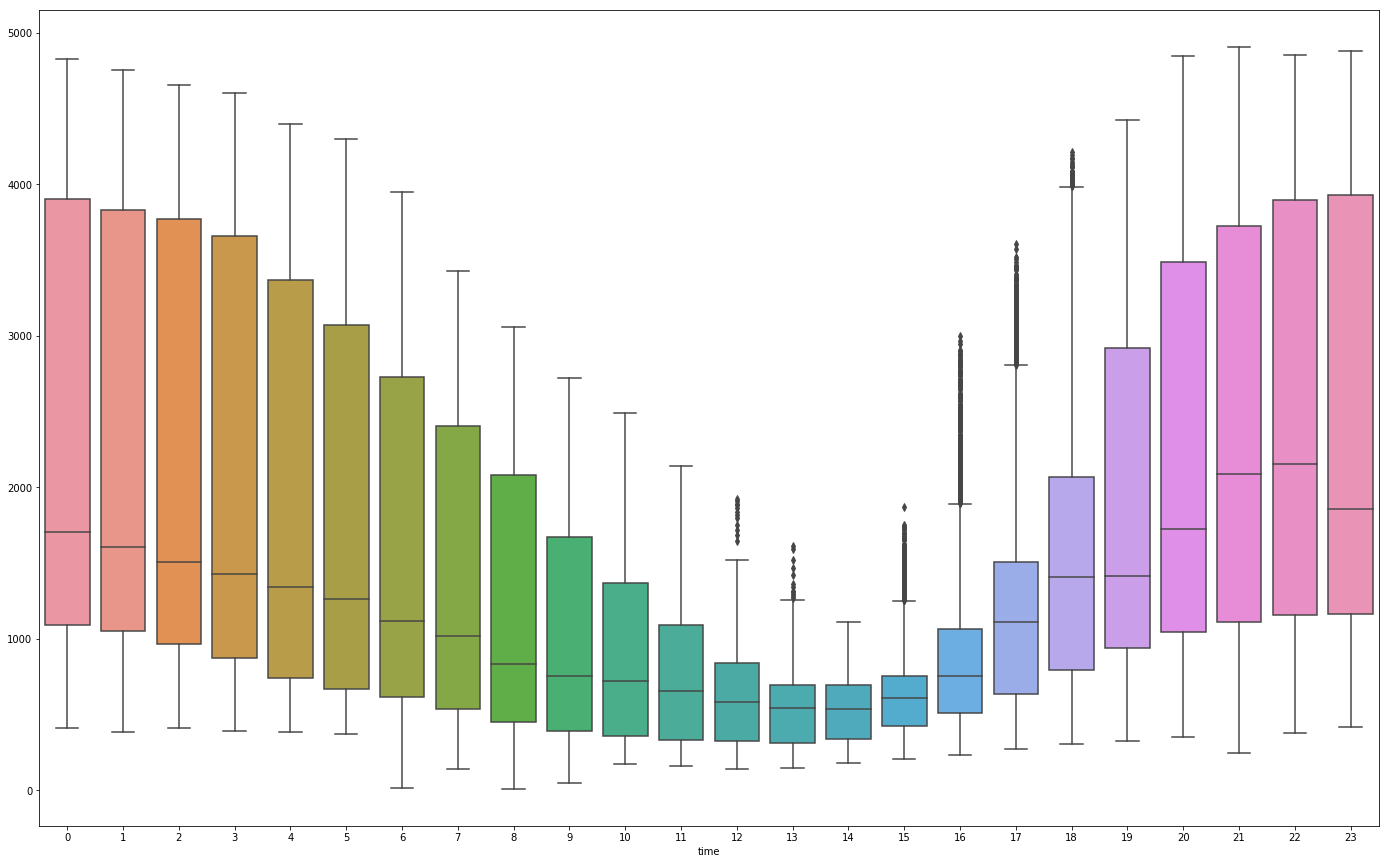

In [10]:
fig, ax = plt.subplots(figsize=(24, 15))
seaborn.boxplot(total_occupancy_vs_time.index.hour, total_occupancy_vs_time, ax=ax)